Classify Dog and cats is easy task for classifier using CNN so here classifing different dog and cat breeds
Credits: fast.ai
Lets start by configuring notebook

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


If you run a script which creates/ downloads files, the files will NOT persist after the allocated instance is shutdown. To save files, you need to permit your Colaboratory instance to read and write files to your Google Drive. Add the following code snippet at the beginning of every notebook

The lines in jupyter notebook that starts with ‘%’ are called Line Magics. These are not instructions for Python to execute, but to Jupyter notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The ***reload_ext autoreload*** reloads modules automatically before entering the execution of code typed at the IPython prompt.

The next line ***autoreload 2*** imports all modules before executing the typed code.

The next line is to plot the graphs inside the jupyter notebook. We use matplotlib inline.

We import all the necessary packages. We are going to work with the fastai V1 library which sits on top of Pytorch 1.0. The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories.
Use the untar_data function to which we must pass a URL as an argument and which will download and extract the data

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [6]:
path=untar_data(URLs.PETS)
path

PosixPath('/content/data/oxford-iiit-pet')

Best part of jupyter notebook is last line of cell will be printed, so instead of print(path) we can write path.

In [7]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/annotations'),
 PosixPath('/content/data/oxford-iiit-pet/images')]

Python 3 has the notation **/** which is useful to navigate into the directory as in the actual directory. We use it to create Path variables with the new location.

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. 

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/data/oxford-iiit-pet/images/chihuahua_66.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/scottish_terrier_129.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/British_Shorthair_59.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Russian_Blue_172.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/pomeranian_1.jpg')]

Fortunately, the fastai library has a handy function made exactly for this, **ImageDataBunch.from_name_re** gets the labels from the filenames using a regular expression.
Detailed explanation of Regular expression is given in this [post](https://medium.com/@jamestjw/parsing-file-names-using-regular-expressions-3e85d64deb69) I found.
Regular expressions understanding is very important.

In [0]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

**ImageDataBunch** is used to do classification based on images. We use the method **from_name_re** to represent that the name of the classification is to be got from the name of the file using a regular expression. 
size argument here is the size to which the image is to be resized. This is usually a square image and 224 is used most of time.
Normalizarion is done which includes changing the range of values of RGB from 0-255 to -1 to 1.

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,scottish_terrier,British_Shorthair,scottish_terrier,yorkshire_terrier
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,newfoundland,wheaten_terrier,samoyed,scottish_terrier
Path: /content/data/oxford-iiit-pet/images;

Test: None

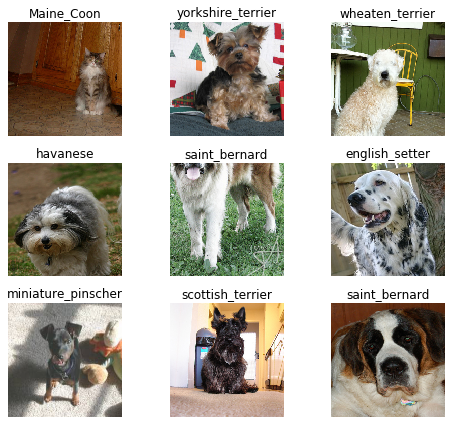

In [12]:
data.show_batch(rows=3, figsize=(7,6))

We use the **data.classes** to indicate the total number of distinct labels that were found. it indicates the number of distinct labels that were extracted from the regular expression.

data.c has very much importance but in this context it gives the total number of classifications that were found in the dataset

In [13]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

This is where I got stuck in following the lesson. And now I understood what Jeremy Howard meant "spend most time in notebooks" and use of forums. 
Many people have tried this course and there is posibility that few would have got same error you are getting. So search for the error you are getting and if not found, ask in forum.

In the instruction code is directly from cnn_learner, but that requires pretrained model and downloading it was problem.
If you want to know the error skip next code cell or [see this](https://forums.fast.ai/t/http-error-403-downloading-cnn/63247/7) To solve this you can download the model manually from pytorch to disk, upload it to colab and move it to the directory in the stack trace. Or better, download it straight to colab. Just use the link to download on the error trace. That can be done by the following code.

In [15]:
!cd /root/.cache/torch/checkpoints && curl -O https://download.pytorch.org/models/resnet34-333f7ec4.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 83.2M  100 83.2M    0     0  17.2M      0  0:00:04  0:00:04 --:--:-- 18.3M


In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

We will train for 4 epochs (4 cycles through all our data).
We create a learner object that takes the data, network and the metrics . The metrics is just used to print out how the training is performing. We choose to print out the error_rate



In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.427111,0.327753,0.100812,01:34
1,0.602179,0.248631,0.076455,01:33
2,0.383989,0.218113,0.066982,01:37
3,0.264342,0.202494,0.060217,01:39


In [0]:
learn.save('stage-1')

We got accuracy of 94% which is just 6% error with just few lines of code, when compared to state of art model in 2012 paper which had 56% accuracy.